[View in Colaboratory](https://colab.research.google.com/github/mdasadul/tensorflow_examples/blob/master/Spiral_keras.ipynb)

We are interested in classificaton. We will try 


1.   Binary Classification
2.   Multi-class classification

We will use Tensorflow backend of Keras for simplicity.

Before starting Let's loads some lirary


In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.python.data import Dataset

np.random.seed(4375689)

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam
from keras.utils import np_utils


Let's create some data by simple function call

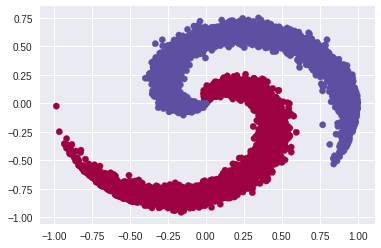

In [3]:

def create_spiral_data(N,D,K):
  X = np.zeros((N*K,D)) # data matrix (each row = single example)
  y = np.zeros(N*K, dtype='uint8') # class labels
  for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
  # lets visualize the data:
  return X,y

N = 5000 # number of points per class
D = 2 # dimensionality
K = 2 # number of classes
X,y = create_spiral_data(N,D,K)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

Accuracy 99.780000
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


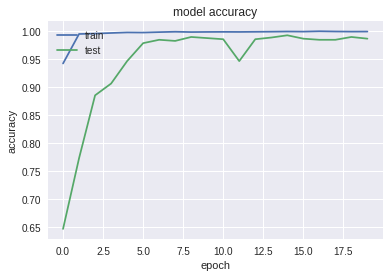

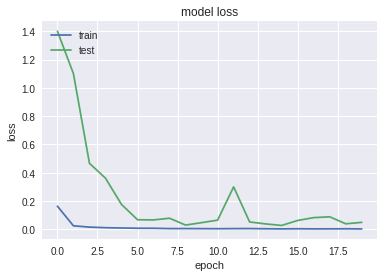

In [4]:
train_X = X
train_y = y

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(2,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(train_X, train_y,validation_split=0.10, batch_size=8, epochs=20, verbose=0)

score = model.evaluate(train_X, train_y, verbose=0)

print("Accuracy %f"% (score[1]*100))
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()